In [119]:
from torch.utils.data import Dataset
import os
from PIL import Image
class SemanticSegmentationDataset(Dataset):
    """Image (semantic) segmentation dataset."""

    def __init__(self, root_dir, image_processor, train=True):
        """
        Args:
            root_dir (string): Root directory of the dataset containing the images + annotations.
            image_processor (SegFormerImageProcessor): image processor to prepare images + segmentation maps.
            train (bool): Whether to load "training" or "validation" images + annotations.
        """
        self.root_dir = root_dir
        self.image_processor = image_processor
        self.train = train

        sub_path = "Training" if self.train else "Validation"
        self.img_dir = os.path.join(self.root_dir, "images", sub_path)
        self.ann_dir = os.path.join(self.root_dir, "annotations", sub_path)

        # read images
        image_file_names = []
        for root, dirs, files in os.walk(self.img_dir):
          image_file_names.extend(files)
        self.images = sorted(image_file_names)

        # read annotations
        annotation_file_names = []
        for root, dirs, files in os.walk(self.ann_dir):
          annotation_file_names.extend(files)
        self.annotations = sorted(annotation_file_names)

        assert len(self.images) == len(self.annotations), "There must be as many images as there are segmentation maps"

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        
        beforenp_image = Image.open(os.path.join(self.img_dir, self.images[idx]))#.convert("RGB")
        beforenp_segmentation_map = Image.open(os.path.join(self.ann_dir, self.annotations[idx]))#.convert("RGB")
        
        # convert into numpy array first
        image = np.array(beforenp_image)
        segmentation_map = np.array(beforenp_segmentation_map)
        # randomly crop + pad both image and segmentation map to same size
        encoded_inputs = self.image_processor(image, segmentation_map, return_tensors="pt")

        for k,v in encoded_inputs.items():
          encoded_inputs[k].squeeze_() # remove batch dimension

        return encoded_inputs

In [120]:
#image = Image.open("content/CustomDataSet/annotations/Training/0@0_2023-03-23_15-38-19-4410_Brick.png")
#image

In [121]:
from transformers import SegformerImageProcessor

new_root_dir = 'content/CustomDataSet'
new_image_processor = SegformerImageProcessor(do_reduce_labels=True)

train_dataset = SemanticSegmentationDataset(root_dir=new_root_dir, image_processor=new_image_processor)
valid_dataset = SemanticSegmentationDataset(root_dir=new_root_dir, image_processor=new_image_processor, train=False)

In [122]:
print("Number of training examples:", len(train_dataset))
print("Number of validation examples:", len(valid_dataset))

Number of training examples: 427
Number of validation examples: 0


In [123]:
train_dataset[0]

{'pixel_values': tensor([[[ 0.3309,  1.1700,  1.2043,  ..., -0.2856, -0.1999, -0.3369],
         [ 0.6221,  1.1872,  1.0673,  ...,  0.0912,  0.0912, -0.1143],
         [ 0.7591,  1.0502,  0.8447,  ...,  0.5022,  0.4166,  0.2111],
         ...,
         [ 1.6838,  1.6153,  1.5468,  ...,  0.6392,  0.3994, -0.2171],
         [ 1.6495,  1.5468,  1.4954,  ...,  0.1939,  0.2624, -0.0972],
         [ 1.5639,  1.4783,  1.4954,  ..., -0.1657,  0.2111,  0.0398]],

        [[ 0.2577,  1.1155,  1.1506,  ..., -0.1275, -0.0049, -0.1450],
         [ 0.5553,  1.1331,  1.0105,  ...,  0.2577,  0.2752,  0.0826],
         [ 0.6954,  0.9930,  0.7829,  ...,  0.6779,  0.5903,  0.4153],
         ...,
         [ 1.8333,  1.7633,  1.6933,  ...,  0.5728,  0.3277, -0.3025],
         [ 1.7983,  1.6933,  1.6408,  ...,  0.1176,  0.1877, -0.1800],
         [ 1.7108,  1.6232,  1.6408,  ..., -0.2500,  0.1352, -0.0399]],

        [[ 0.2696,  1.1237,  1.1585,  ..., -0.1487, -0.0441, -0.1835],
         [ 0.5659,  1.1237, 

In [137]:
new_encoded_inputs = train_dataset[0]

In [138]:
new_encoded_inputs["pixel_values"].shape

torch.Size([3, 512, 512])

In [139]:
new_encoded_inputs["labels"].shape

torch.Size([360, 512, 512])

In [140]:
new_encoded_inputs["labels"]

tensor([[[255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         ...,
         [167, 167, 167,  ...,  42,  42,  42],
         [167, 167, 167,  ...,  42,  42,  42],
         [167, 167, 167,  ...,  42,  42,  42]],

        [[ 86,  86,  86,  ..., 152, 152, 152],
         [ 86,  86,  86,  ..., 152, 152, 152],
         [ 86,  86,  86,  ..., 152, 152, 152],
         ...,
         [167, 167, 167,  ...,  42,  42,  42],
         [167, 167, 167,  ...,  42,  42,  42],
         [167, 167, 167,  ...,  42,  42,  42]],

        [[ 86,  86,  86,  ..., 152, 152, 152],
         [ 86,  86,  86,  ..., 152, 152, 152],
         [ 86,  86,  86,  ..., 152, 152, 152],
         ...,
         [167, 167, 167,  ...,  42,  42,  42],
         [167, 167, 167,  ...,  42,  42,  42],
         [167, 167, 167,  ...,  42,  42,  42]],

        ...,

        [[ 86,  86,  86,  ..., 152, 152, 152],
         [ 86,  86,  86,  ..., 152, 152, 152]

In [141]:
new_encoded_inputs["labels"].squeeze().unique()


tensor([  9,  42,  52,  57,  80,  86, 103, 116, 119, 146, 152, 167, 184, 197,
        255])

In [142]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=2)


In [143]:
batch = next(iter(train_dataloader))

In [133]:
for out_k,out_v in batch.items():
  print(out_k, out_v.shape)

pixel_values torch.Size([2, 3, 512, 512])
labels torch.Size([2, 360, 512, 512])


In [144]:
batch["labels"].shape

torch.Size([2, 360, 512, 512])

In [145]:
mask = (batch["labels"] != 255)
mask

tensor([[[[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [ True,  True,  True,  ...,  True,  True,  True],
          [ True,  True,  True,  ...,  True,  True,  True],
          [ True,  True,  True,  ...,  True,  True,  True]],

         [[ True,  True,  True,  ...,  True,  True,  True],
          [ True,  True,  True,  ...,  True,  True,  True],
          [ True,  True,  True,  ...,  True,  True,  True],
          ...,
          [ True,  True,  True,  ...,  True,  True,  True],
          [ True,  True,  True,  ...,  True,  True,  True],
          [ True,  True,  True,  ...,  True,  True,  True]],

         [[ True,  True,  True,  ...,  True,  True,  True],
          [ True,  True,  True,  ...,  True,  True,  True],
          [ True,  True,  True,  ...,  True,  True,  True],
          ...,
          [ True,  True,  True,  ...,  True,  True,

In [146]:
batch["labels"][mask]

tensor([ 86,  86,  86,  ..., 119, 119, 119])

In [147]:

from transformers import SegformerForSemanticSegmentation

# load id2label mapping from a JSON 
import json

# simple example
id2label = {0: 'Brick', 1: 'Cane',2:'Cellar door', 3:'Concrete',4:'Dirt',5:'Manhole Cover',6:'Other',7:'Subway Grates',8:'Tactile Pavement'}
label2id = {v: k for k, v in id2label.items()}

with open('cats-and-dogs-id2label.json', 'w') as fp:
    json.dump(id2label, fp)


model = SegformerForSemanticSegmentation.from_pretrained("nvidia/mit-b5",
                                                         num_labels=9,
                                                         id2label=id2label,
                                                         label2id=label2id,
)

Some weights of SegformerForSemanticSegmentation were not initialized from the model checkpoint at nvidia/mit-b5 and are newly initialized: ['decode_head.batch_norm.bias', 'decode_head.batch_norm.num_batches_tracked', 'decode_head.batch_norm.running_mean', 'decode_head.batch_norm.running_var', 'decode_head.batch_norm.weight', 'decode_head.classifier.bias', 'decode_head.classifier.weight', 'decode_head.linear_c.0.proj.bias', 'decode_head.linear_c.0.proj.weight', 'decode_head.linear_c.1.proj.bias', 'decode_head.linear_c.1.proj.weight', 'decode_head.linear_c.2.proj.bias', 'decode_head.linear_c.2.proj.weight', 'decode_head.linear_c.3.proj.bias', 'decode_head.linear_c.3.proj.weight', 'decode_head.linear_fuse.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [148]:
import evaluate

metric = evaluate.load("mean_iou")
new_image_processor.do_reduce_labels


True

In [149]:
import torch
from torch import nn
from tqdm.notebook import tqdm

# define optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=0.00006)
# move model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

model.train()
for epoch in range(200):  # loop over the dataset multiple times
   print("Epoch:", epoch)
   for new_idx, batch in enumerate(tqdm(train_dataloader)):
        # get the inputs;
        pixel_values = batch["pixel_values"].to(device)
        labels = batch["labels"].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(pixel_values=pixel_values, labels=labels)
        loss, logits = outputs.loss, outputs.logits

        loss.backward()
        optimizer.step()

        # evaluate
        with torch.no_grad():
          upsampled_logits = nn.functional.interpolate(logits, size=labels.shape[-2:], mode="bilinear", align_corners=False)
          predicted = upsampled_logits.argmax(dim=1)

          # note that the metric expects predictions + labels as numpy arrays
          metric.add_batch(predictions=predicted.detach().cpu().numpy(), references=labels.detach().cpu().numpy())

        # let's print loss and metrics every 100 batches
        if new_idx % 100 == 0:
          # currently using _compute instead of compute
          # see this issue for more info: https://github.com/huggingface/evaluate/pull/328#issuecomment-1286866576
          metrics = metric._compute(
                  predictions=predicted.cpu(),
                  references=labels.cpu(),
                  num_labels=len(id2label),
                  ignore_index=255,
                  reduce_labels=False, # we've already reduced the labels ourselves
              )

          print("Loss:", loss.item())
          print("Mean_iou:", metrics["mean_iou"])
          print("Mean accuracy:", metrics["mean_accuracy"])

Epoch: 0


  0%|          | 0/214 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
new_image = Image.open('content/CustomDataSet/images/Training/0@0_2023-03-23_15-38-19-4410_Brick.jpg')
new_image

In [100]:
# prepare the image for the model
pixel_values = new_image_processor(new_image, return_tensors="pt").pixel_values.to(device)
print(pixel_values.shape)
     

NameError: name 'device' is not defined

In [101]:
import torch

# forward pass
with torch.no_grad():
  outputs = model(pixel_values=pixel_values)


NameError: name 'pixel_values' is not defined

In [ ]:
# logits are of shape (batch_size, num_labels, height/4, width/4)
logits = outputs.logits.cpu()
print(logits.shape)

In [ ]:
def ade_palette():
    """ADE20K palette that maps each class to RGB values."""
    return [[198,117,58],[53,104,120],[204,125,6],[87,147,153],[0, 224, 192],[39, 188,102],[81, 185, 10],[68, 193, 117],[168,185,43]]


In [ ]:
predicted_segmentation_map = new_image_processor.post_process_semantic_segmentation(outputs, target_sizes=[new_image.size[::-1]])[0]
predicted_segmentation_map = predicted_segmentation_map.cpu().numpy()
print(predicted_segmentation_map)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

color_seg = np.zeros((predicted_segmentation_map.shape[0],
                      predicted_segmentation_map.shape[1], 3), dtype=np.uint8) # height, width, 3

palette = np.array(ade_palette())
for label, color in enumerate(palette):
    color_seg[predicted_segmentation_map == label, :] = color
# Convert to BGR
color_seg = color_seg[..., ::-1]

# Show image + mask
img = np.array(new_image) * 0.5 + color_seg * 0.5
img = img.astype(np.uint8)

plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.show()
     


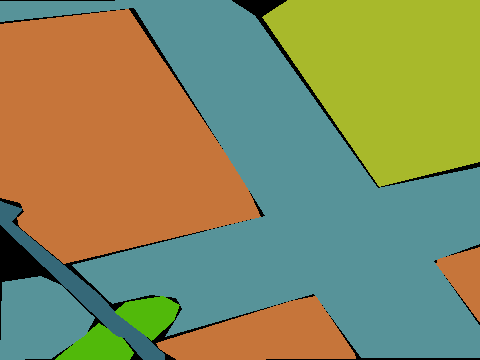

In [91]:
notBuiltInMap = Image.open('content/CustomDataSet/annotations/Training/0@0_2023-03-23_15-38-19-4410_Brick.png')
notBuiltInMap

In [ ]:
# convert map to NumPy array
notBuiltInMap = np.array(notBuiltInMap)
notBuiltInMap[notBuiltInMap == 0] = 255 # background class is replaced by ignore_index
notBuiltInMap = notBuiltInMap - 1 # other classes are reduced by one
notBuiltInMap[notBuiltInMap == 254] = 255

classes_map = np.unique(notBuiltInMap).tolist()
unique_classes = [model.config.id2label[idx] if idx!=255 else None for idx in classes_map]
print("Classes in this image:", unique_classes)

# create coloured map
color_seg = np.zeros((notBuiltInMap.shape[0], notBuiltInMap.shape[1], 3), dtype=np.uint8) # height, width, 3
palette = np.array(ade_palette())
for label, color in enumerate(palette):
    color_seg[notBuiltInMap == label, :] = color
# Convert to BGR
color_seg = color_seg[..., ::-1]

# Show image + mask
img = np.array(new_image) * 0.5 + color_seg * 0.5
img = img.astype(np.uint8)

plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.show()

In [ ]:
# metric expects a list of numpy arrays for both predictions and references
metrics = metric._compute(
                  predictions=[predicted_segmentation_map],
                  references=[notBuiltInMap],
                  num_labels=len(id2label),
                  ignore_index=255,
                  reduce_labels=False, # we've already reduced the labels ourselves
              )

In [ ]:
metrics.keys()


In [ ]:
import pandas as pd

# print overall metrics
for key in list(metrics.keys())[:3]:
  print(key, metrics[key])

# pretty-print per category metrics as Pandas DataFrame
metric_table = dict()
for new_id, label in id2label.items():
    metric_table[label] = [
                           metrics["per_category_iou"][id],
                           metrics["per_category_accuracy"][id]
    ]

print("---------------------")
print("per-category metrics:")
pd.DataFrame.from_dict(metric_table, orient="index", columns=["IoU", "accuracy"])